In [45]:
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib notebook
%matplotlib inline
# %matplotlib qt

def plot_knot_eigs(crossings, index):
    path = "../eigs4-12/knot_" + str(crossings) + "_" + str(index) + "_eigs"
    dict = {}
    i_vals = []
    j_vals = []
    ratios = []
    with open(path) as reader:
        line = reader.readline().strip().split(" ")
        while line != ['']:
            i_vals.append(int(line[0]))
            j_vals.append(int(line[1]))

            eigs = []
            for eig_val in line[3:]:
                eigs.append(float(eig_val))
            
            min_idx = int(line[2])
            # while abs(eigs[min_idx]) < 1e-4: # math.isclose(0,, rel_tol=1e-4):
            #     min_idx += 1

            ratios.append(eigs[-1] / eigs[min_idx])

            line = reader.readline().strip().split(" ")
    return i_vals, j_vals, ratios

# i_vals, j_vals, ratios = plot_knot_eigs(10,3)

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(i_vals, j_vals, ratios)

# # plt.xticks(range(-6,6))
# # plt.yticks(range(-6,15))
# plt.show()

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.1)



(<matplotlib.image.AxesImage at 0x7ff6d7d9f978>,
 <matplotlib.colorbar.Colorbar at 0x7ff6d83859e8>)

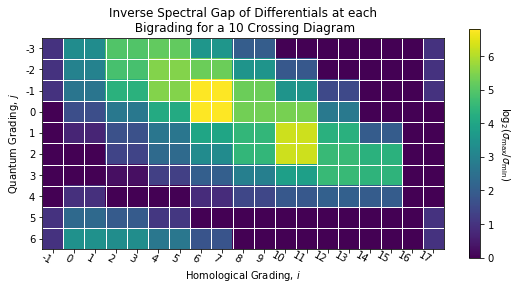

In [155]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """


    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, shrink=0.7, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    ax.set_ylabel("Quantum Grading, $j$")
    ax.set_xlabel("Homological Grading, $i$")
    ax.set_title("Inverse Spectral Gap of Differentials at each\n Bigrading for a 10 Crossing Diagram")

    fig.patch.set_facecolor('w')


    plt.savefig("./heat-map.png")
    return im, cbar

i_vals, j_vals, ratios = plot_knot_eigs(10,648)
import numpy as np
import math

i_range = max(i_vals)-min(i_vals)
j_range = max(j_vals)-min(j_vals)

M = np.zeros((i_range, j_range))
for n in range(len(ratios)):
    M[i_vals[n], j_vals[n]] = math.log(ratios[n],2)

i_min = min(i_vals)
j_min = min(j_vals)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot()
heatmap(M, range(i_min, i_min + i_range), range(j_min, j_min + j_range), cbarlabel="$\log_2(\sigma_\max/\sigma_\min)$")




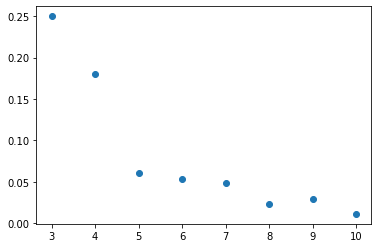

In [ ]:

def get_min_eig_ratio(crossings):
    ratios = []
    
    max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    for index in range(1, max_indexes[crossings - 3] + 1):
        i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    return min(ratios)

max_ratios = []
for crossings in range(3,11):
    max_ratios.append(get_min_eig_ratio(crossings))

plt.scatter(range(3,11), max_ratios)
plt.show()

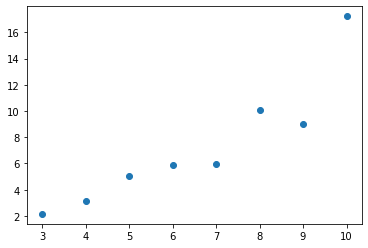

In [ ]:
def get_mean_eig_ratio(crossings):
    ratios = []
    
    max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    for index in range(1, max_indexes[crossings - 3] + 1):
        i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    return np.array(ratios).mean()

mean_ratios = []
for crossings in range(3,11):
    mean_ratios.append(get_mean_eig_ratio(crossings))

plt.scatter(range(3,11), mean_ratios)
plt.show()


/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/lib/python3/dist-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


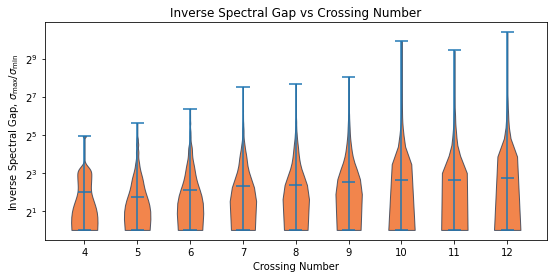

In [146]:
import random

n_samples = 10

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def get_rand_eig_ratio(crossings):
    ratios = []

    # max_indexes = [1, 1, 2, 3, 7, 21, 49, 165]
    # for index in range(1, max_indexes[crossings - 3] + 1):
    # if crossings == 9:
    #     for index in range(518, 569):
    #         i_vals, j_vals, ratios = plot_knot_eigs(crossings, index)
    #     return ratios

    for index in range(0, 100):
        if crossings == 9 and (crossings-4)*100 + index in range(502,518):
            continue
        elif crossings == 12 and (crossings-4)*100 + index > 849:
            break
        i_vals, j_vals, crossing_ratios = plot_knot_eigs(crossings, (crossings-4)*100 + index)
        ratios += crossing_ratios
    return ratios

ratios = []
x_vals = []
data = np.array([get_rand_eig_ratio(crossings) for crossings in range(4,13)])

fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

ax.set_title('Inverse Spectral Gap vs Crossing Number')
ax.set_ylabel('Inverse Spectral Gap, $\sigma_\max/\sigma_\min$')

parts = ax.violinplot(
        data, showmeans=False, showmedians=True,
        showextrema=True)

for pc in parts['bodies']:
    pc.set_facecolor('#ed5100')
    pc.set_edgecolor('#0f2947')
    pc.set
    pc.set_alpha(0.7)

labels = [str(i) for i in range(4, 13)]

ax.xaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)
ax.set_xlim(0.25, len(labels) + 0.75)
ax.set_xlabel('Crossing Number')

ax.set_yscale('log', basey=2)

fig.patch.set_facecolor('w')

plt.savefig("./spectral-gap-4-12.png")
plt.show()